In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
from config import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "../output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

640

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=543a3d36f0c597f9720cd41c1c6c60c5&units=imperial&q='

In [15]:
#Perform API Calls
#Perform a weather check on each city using a series of successive API calls
#Include a print log of each city as it's being processed (with the city number and city name)
test_cities = ["Los Angeles","New York","Chicago"]
weather_data = []
#for city in test_cities:
for city in cities:
    respond = requests.get(query_url + city).json()
    try: 
        data = {
            "City": respond["name"],
            "Lat": respond["coord"]["lat"],
            "Lng" : respond["coord"]["lon"],
            "Max Temp" : respond["main"]["temp_max"],
            "Humidity" : respond["main"]["humidity"],
            "Cloudiness" : respond["clouds"]["all"],
            "Wind Speed" : respond["wind"]["speed"],
            "Country" : respond["sys"]["country"],
            "Date" : respond["dt"]
        }
        weather_data.append(data)
    except: 
        print(f"{city} not found")


kadykchan not found
amderma not found
tarudant not found
gulshat not found
grimari not found
illoqqortoormiut not found
tsihombe not found
attawapiskat not found
taolanaro not found
deshna not found
alotau not found
mullaitivu not found
rungata not found
samusu not found
marcona not found
vaitupu not found
nizhneyansk not found
babanusah not found
malwan not found
lolua not found
bacuit not found
halalo not found
barentsburg not found
meyungs not found
dolbeau not found
nguiu not found
belushya guba not found
bolungarvik not found
grand river south east not found
afmadu not found
rawannawi not found
palabuhanratu not found
cheuskiny not found
urulga not found
mys shmidta not found
tumannyy not found
kuche not found
barawe not found
karauzyak not found
shchelyayur not found
mergui not found
hihifo not found
mocambique not found
buariki not found
kamenskoye not found
saleaula not found
louisbourg not found
umzimvubu not found
tabukiniberu not found
sentyabrskiy not found
grand centre not

In [16]:
#Convert Raw Data to DataFrame. Export city data into a csv.
#Display the DataFrame
df = pd.DataFrame(weather_data)
df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.20,-175.20,78.80,88,20,11.41,TO,1601516832
1,Bluff,-46.60,168.33,61.00,48,99,5.01,NZ,1601516833
2,Puerto Ayora,-0.74,-90.35,68.00,88,98,5.99,EC,1601516833
3,Hermanus,-34.42,19.23,53.47,78,100,25.01,ZA,1601516833
4,Saint Anthony,45.02,-93.22,53.60,54,40,17.22,US,1601517021
...,...,...,...,...,...,...,...,...,...
573,Callaway,30.15,-85.57,68.00,77,1,4.70,US,1601517207
574,Perbaungan,3.57,98.96,81.27,77,0,3.78,ID,1601517207
575,Norrtälje,59.76,18.70,54.00,24,29,4.25,SE,1601517207
576,Rock Sound,24.90,-76.20,84.31,76,82,9.55,BS,1601517208


In [17]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,18.712007,15.414014,63.174550,73.020761,50.295848,8.140554,1.601517e+09
std,33.709491,88.093970,16.167007,20.074979,40.355406,5.732045,9.707353e+01
min,-54.800000,-175.200000,10.980000,1.000000,0.000000,0.290000,1.601517e+09
25%,-9.605000,-61.595000,51.800000,64.000000,3.250000,3.835000,1.601517e+09
50%,20.910000,19.180000,64.400000,78.000000,51.500000,6.700000,1.601517e+09
75%,47.805000,92.720000,77.067500,88.000000,90.000000,11.410000,1.601517e+09
max,78.220000,178.420000,96.800000,100.000000,100.000000,36.690000,1.601517e+09


In [22]:
clean_df = df.loc[df["Humidity"]<100]
clean_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.20,-175.20,78.80,88,20,11.41,TO,1601516832
1,Bluff,-46.60,168.33,61.00,48,99,5.01,NZ,1601516833
2,Puerto Ayora,-0.74,-90.35,68.00,88,98,5.99,EC,1601516833
3,Hermanus,-34.42,19.23,53.47,78,100,25.01,ZA,1601516833
4,Saint Anthony,45.02,-93.22,53.60,54,40,17.22,US,1601517021
...,...,...,...,...,...,...,...,...,...
573,Callaway,30.15,-85.57,68.00,77,1,4.70,US,1601517207
574,Perbaungan,3.57,98.96,81.27,77,0,3.78,ID,1601517207
575,Norrtälje,59.76,18.70,54.00,24,29,4.25,SE,1601517207
576,Rock Sound,24.90,-76.20,84.31,76,82,9.55,BS,1601517208


In [29]:
#Inspect data and remove cities where the humidity >100%

cleandf = df.loc[df["Humidity"]<100]
cleandf

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.20,-175.20,78.80,88,20,11.41,TO,1601516832
1,Bluff,-46.60,168.33,61.00,48,99,5.01,NZ,1601516833
2,Puerto Ayora,-0.74,-90.35,68.00,88,98,5.99,EC,1601516833
3,Hermanus,-34.42,19.23,53.47,78,100,25.01,ZA,1601516833
4,Saint Anthony,45.02,-93.22,53.60,54,40,17.22,US,1601517021
...,...,...,...,...,...,...,...,...,...
573,Callaway,30.15,-85.57,68.00,77,1,4.70,US,1601517207
574,Perbaungan,3.57,98.96,81.27,77,0,3.78,ID,1601517207
575,Norrtälje,59.76,18.70,54.00,24,29,4.25,SE,1601517207
576,Rock Sound,24.90,-76.20,84.31,76,82,9.55,BS,1601517208


In [28]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels


output_data_df = pd.read_csv(output_data_file)
output_data_df.head()



,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


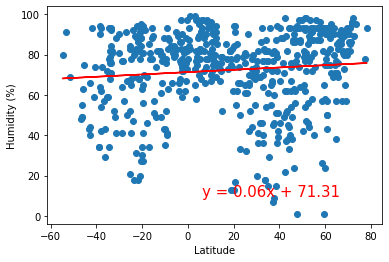

In [30]:
#City Latitude vs. Max Temperature
x_values = cleandf['Lat']
y_values = cleandf['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()


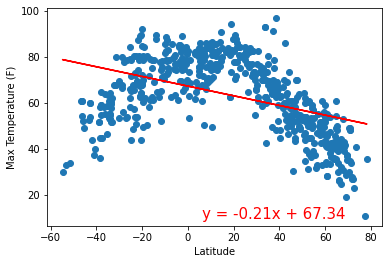

In [31]:
#Latitude vs Cloudiness
#City Latitude vs. Max Temperature
x_values = cleandf['Lat']
y_values = cleandf['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

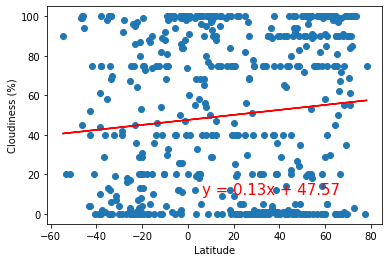

In [32]:
#Latitude vs. Wind Speed Plot
x_values = cleandf['Lat']
y_values = cleandf['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

In [ ]:
#Linear Regression
# R value for Northern Hemisphere-Max Temp vs. Latitude linear regression

In [ ]:
#Linear Regression for Max Temp vs Latitude

In [ ]:
#Linear Regression for Humidity (%) vs. Latitude